In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import ternary # ternary plot has a bug
import plotly.express as px
import h5py
import matplotlib as mpl

# import geopandas as gpd

from matplotlib.patches import Circle, Wedge, Polygon

import os
import matplotlib.patheffects as path_effects


from netCDF4 import Dataset as NetCDFFile 

from obspy.imaging.beachball import beach

# for beachball - there are some error with using obspy
from pyrocko.plot import beachball
from pyrocko import moment_tensor as ptm

import cartopy.crs as ccrs
import cartopy.mpl.geoaxes

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
from pathlib import Path
%matplotlib inline

import harmonica as hm

from obspy.core import UTCDateTime

from matplotlib.patches import Polygon

import seaborn as sns
sns.set()
sns.set_style(style='white') 
sns.set_style("ticks", {"xtick.major.size": 0.5, "ytick.major.size": 0.5})

# set the font globally
plt.rcParams.update({'font.family':'Helvetica'})

In [33]:
# earthquakes
data = pd.read_csv("/Users/mohd0001/PhD_Monash/Paper2/time-series/data/SUeq_data.csv",  header = 'infer')

data.sort_values(by = 'MW', ascending = False, inplace = True)

data['DATE'] = pd.to_datetime(data['DATE']) # change dtype to datetime format
data['DATE'] = data['DATE'].dt.strftime('%Y-%m-%d') # change dtype to object

# data['DATE'] and data['TIME'] should be object (str) to perform + operator

data_dummy = np.array(data['DATE'] + ' ' + data['TIME'])

data_ev_time = []

for val in data_dummy:
    data_ev_time.append(UTCDateTime(val))

    
ref_date = data_ev_time[0]

data_ev_time = np.array(data_ev_time)

date = []

for val in data_ev_time:
    date.append(val - ref_date)
    
date = np.array(date) # this is in seconds

data['YEARS'] = date/31536000

df = data.sort_values(by ='YEARS', ascending=True) # this is an important step
# data = data[(data['DATE'] > '01-01-2003') & (data['DATE'] < '26-11-2004')]

In [34]:
df['DEPTH'] = df['DEPTH']*-1

In [35]:
## set Mc limit for the entire catalogue
# df = df[(df['MW'] >= 5.1)]

In [36]:
## set x and y axis limit and tect for upper plate, subducting plate and megathrust

x_axis = [-10, 10]
y_axis_SP_AS = [-300, 0]
y_axis_SP_SJ = [-700, 0]
y_axis_UP = [-80, 0]
y_axis_mt = [-70, 0]

xtext=-9.5
ytext_UP=-70
ytext_SP_AS=-250
ytext_SP_SJ=-600
ytext_mt=-60

## Andaman upper plate

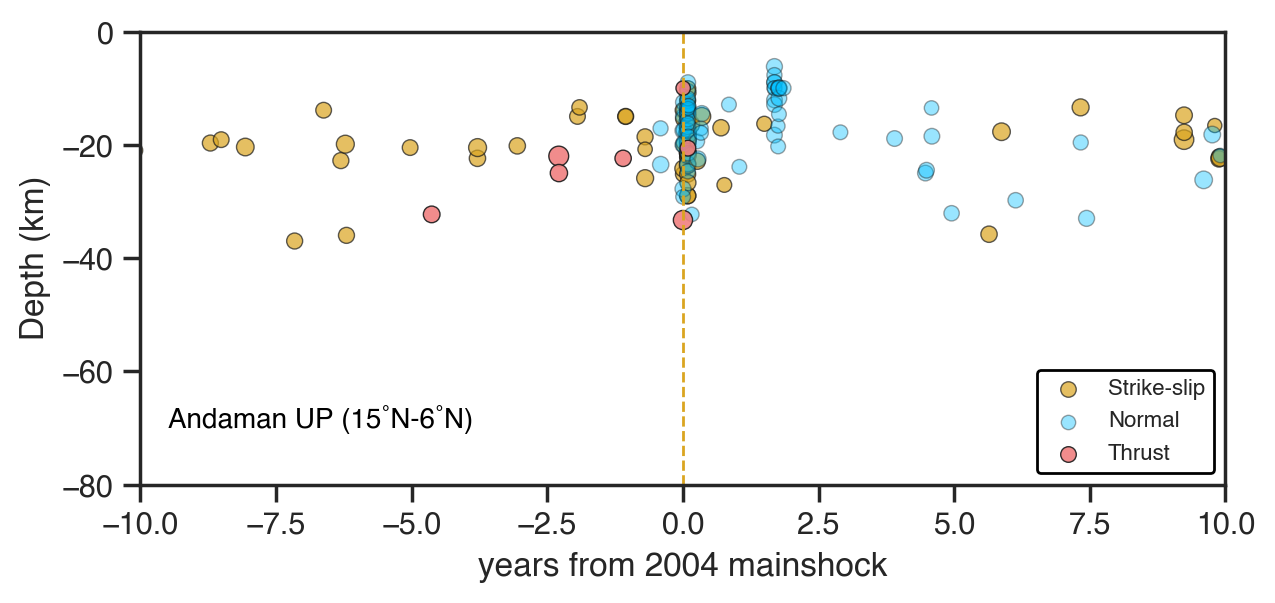

In [37]:
data = df[(df['CLASS'] == 'UPPER') & (df['P(km)'] >= 0)]

df_sum_norm = data[(data['DEPTH'] < 0) &
                  (data['LAT'] >= 6) & (data['LAT'] <= 15) &
             (data['TYPE'] == 'NORM')]

df_sum_thrust = data[(data['DEPTH'] < 0) &
                  (data['LAT'] >= 6) & (data['LAT'] <= 15) &
             (data['TYPE'] == 'THRUST')]

df_sum_ss = data[(data['DEPTH'] > -300) &
                  (data['LAT'] >= 6) & (data['LAT'] <= 15) &
             (data['TYPE'] == 'SS')]


fig, ax = plt.subplots(dpi = 200, figsize=(7,3))

fig1 = ax

fig1.scatter(df_sum_ss['YEARS'], df_sum_ss['DEPTH'], s = df_sum_ss['MW']**2.1, linewidth = 0.5,
             edgecolors = 'k', alpha = 0.7, c = 'goldenrod', label='Strike-slip')
fig1.scatter(df_sum_norm['YEARS'], df_sum_norm['DEPTH'], s = df_sum_norm['MW']**2.1, linewidth = 0.5,
             edgecolors = 'k', alpha = 0.4, c = 'deepskyblue', label='Normal')
fig1.scatter(df_sum_thrust['YEARS'], df_sum_thrust['DEPTH'], s = df_sum_thrust['MW']**2.1, linewidth = 0.5,
             edgecolors = 'k', alpha = 0.9, c = 'lightcoral', label='Thrust')

lw=1
fig1.axvline(x=0, color='goldenrod', lw=lw, ls='--')
# fig1.axvline(x=0.25, color='blue', lw=lw, ls='--')
# fig1.axvline(x=2.8, color='grey', lw=lw, ls='--')

fig1.set_xlabel('years from 2004 mainshock')
fig1.set_ylabel('Depth (km)') 

fig1.set_xlim(x_axis)
fig1.set_ylim(y_axis_UP)

fig1.legend(loc = 'lower right',
            fontsize = 8,
            facecolor="white",
            framealpha=1,
            edgecolor="black",
            markerscale=0.9)

ax.text(xtext, ytext_UP, 'Andaman UP (15˚N-6˚N)',color='black',
        fontsize=10) #ha='center'


plt.savefig("/Users/mohd0001/PhD_Monash/Paper2/output/TimeDepth_upperAND.png",
            dpi = 300, transparent= True, bbox_inches='tight')

## Andaman subducting plate

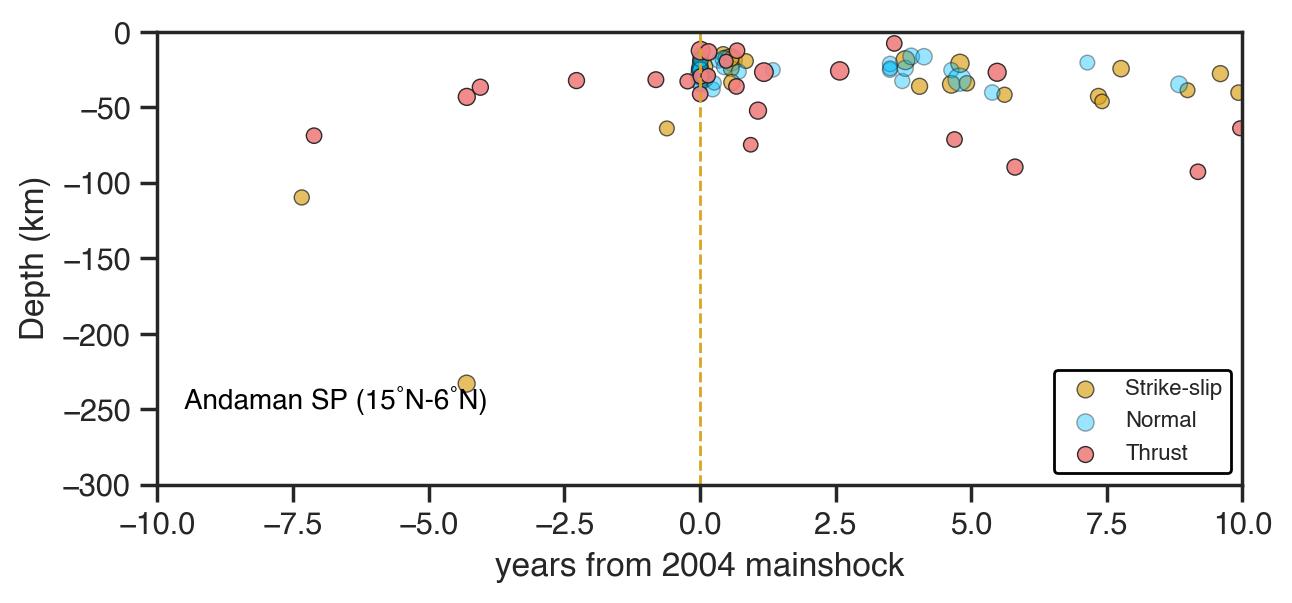

In [38]:
data = df[(df['CLASS'] == 'DGOING') & (df['P(km)'] >= 0)]

df_sum_norm = data[(data['DEPTH'] < 0) &
                  (data['LAT'] >= 6) & (data['LAT'] <= 15) &
             (data['TYPE'] == 'NORM')]

df_sum_thrust = data[(data['DEPTH'] < 0) &
                  (data['LAT'] >= 6) & (data['LAT'] <= 15) &
             (data['TYPE'] == 'THRUST')]

df_sum_ss = data[(data['DEPTH'] < 0) &
                  (data['LAT'] >= 6) & (data['LAT'] <= 15) &
             (data['TYPE'] == 'SS')]


fig, ax = plt.subplots(dpi = 200, figsize=(7,3))

fig1 = ax


fig1.scatter(df_sum_ss['YEARS'], df_sum_ss['DEPTH'], s = df_sum_ss['MW']**2.1, linewidth = 0.5,
             edgecolors = 'k', alpha = 0.7, c = 'goldenrod', label='Strike-slip')
fig1.scatter(df_sum_norm['YEARS'], df_sum_norm['DEPTH'], s = df_sum_norm['MW']**2.1, linewidth = 0.5,
             edgecolors = 'k', alpha = 0.4, c = 'deepskyblue', label='Normal')
fig1.scatter(df_sum_thrust['YEARS'], df_sum_thrust['DEPTH'], s = df_sum_thrust['MW']**2.1, linewidth = 0.5,
             edgecolors = 'k', alpha = 0.9, c = 'lightcoral', label='Thrust')

fig1.axvline(x=0, color='goldenrod', lw=lw, ls='--')
# fig1.axvline(x=0.25, color='blue', lw=lw, ls='--')
# fig1.axvline(x=2.8, color='grey', lw=lw, ls='--')

fig1.set_xlabel('years from 2004 mainshock')
fig1.set_ylabel('Depth (km)') 

fig1.set_xlim(x_axis)
fig1.set_ylim(y_axis_SP_AS)

fig1.legend(loc = 'lower right',
            fontsize = 8,
            facecolor="white",
            framealpha=1,
            edgecolor="black",
            markerscale=0.9)


ax.text(xtext, ytext_SP_AS, 'Andaman SP (15˚N-6˚N)',color='black',
        fontsize=10) #ha='center'


plt.savefig("/Users/mohd0001/PhD_Monash/Paper2/output/TimeDepth_slabAND.png",
            dpi = 300, transparent= True, bbox_inches='tight')

## Mid-northwest Sumatra Upper plate

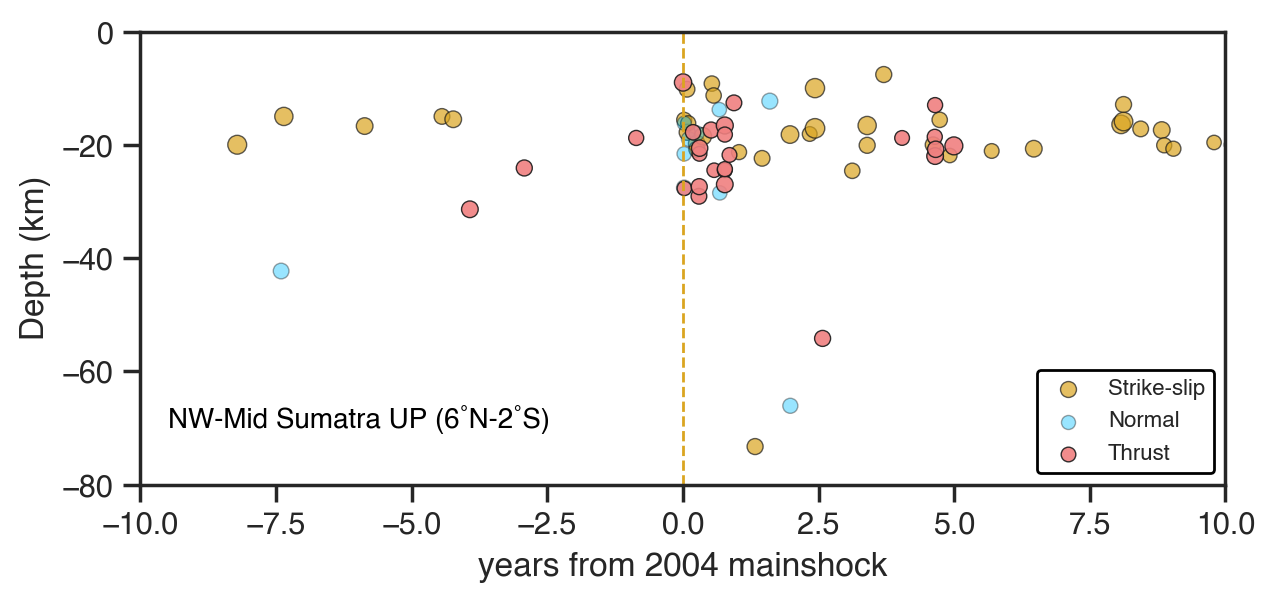

In [39]:
data = df[(df['CLASS'] == 'UPPER') & (df['P(km)'] >= 0)]

df_sum_norm = data[(data['DEPTH'] < 0) &
                  (data['LAT'] > -2) & (data['LAT'] <= 6) &
             (data['TYPE'] == 'NORM')]

df_sum_thrust = data[(data['DEPTH'] < 0) &
                  (data['LAT'] > -2) & (data['LAT'] <= 6) &
             (data['TYPE'] == 'THRUST')]

df_sum_ss = data[(data['DEPTH'] < 0) &
                  (data['LAT'] > -2) & (data['LAT'] <= 6) &
             (data['TYPE'] == 'SS')]


fig, ax = plt.subplots(dpi = 200, figsize=(7,3))

fig1 = ax


fig1.scatter(df_sum_ss['YEARS'], df_sum_ss['DEPTH'], s = df_sum_ss['MW']**2.1, linewidth = 0.5,
             edgecolors = 'k', alpha = 0.7, c = 'goldenrod', label='Strike-slip')
fig1.scatter(df_sum_norm['YEARS'], df_sum_norm['DEPTH'], s = df_sum_norm['MW']**2.1, linewidth = 0.5,
             edgecolors = 'k', alpha = 0.4, c = 'deepskyblue', label='Normal')
fig1.scatter(df_sum_thrust['YEARS'], df_sum_thrust['DEPTH'], s = df_sum_thrust['MW']**2.1, linewidth = 0.5,
             edgecolors = 'k', alpha = 0.9, c = 'lightcoral', label='Thrust')

fig1.axvline(x=0, color='goldenrod', lw=lw, ls='--')
# fig1.axvline(x=0.25, color='blue', lw=lw, ls='--')
# fig1.axvline(x=2.8, color='grey', lw=lw, ls='--')

fig1.set_xlabel('years from 2004 mainshock')
fig1.set_ylabel('Depth (km)') 

fig1.set_xlim(x_axis)
fig1.set_ylim(y_axis_UP)

fig1.legend(loc = 'lower right',
            fontsize = 8,
            facecolor="white",
            framealpha=1,
            edgecolor="black",
            markerscale=0.9)

ax.text(xtext, ytext_UP, 'NW-Mid Sumatra UP (6˚N-2˚S)',color='black',
        fontsize=10) #ha='center'


plt.savefig("/Users/mohd0001/PhD_Monash/Paper2/output/TimeDepth_upperNWsum.png",
            dpi = 300, transparent= True, bbox_inches='tight')

## Mid-northwest Sumatra subducting plate

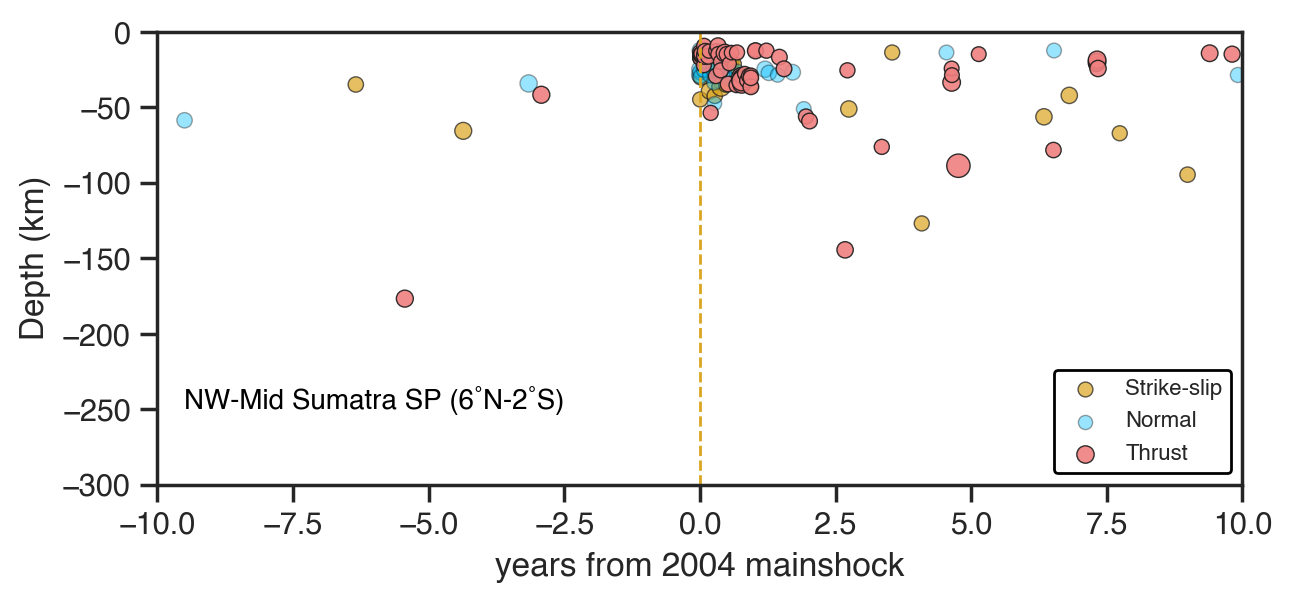

In [40]:
data = df[(df['CLASS'] == 'DGOING') & (df['P(km)'] >= 0)]

df_sum_norm = data[(data['DEPTH'] < 0) &
                  (data['LAT'] > -2) & (data['LAT'] <= 6) &
             (data['TYPE'] == 'NORM')]

df_sum_thrust = data[(data['DEPTH'] < 0) &
                  (data['LAT'] > -2) & (data['LAT'] <= 6) &
             (data['TYPE'] == 'THRUST')]

df_sum_ss = data[(data['DEPTH'] < 0) &
                  (data['LAT'] > -2) & (data['LAT'] <= 6) &
             (data['TYPE'] == 'SS')]


fig, ax = plt.subplots(dpi = 200, figsize=(7,3))

fig1 = ax


fig1.scatter(df_sum_ss['YEARS'], df_sum_ss['DEPTH'], s = df_sum_ss['MW']**2.1, linewidth = 0.5,
             edgecolors = 'k', alpha = 0.7, c = 'goldenrod', label='Strike-slip')
fig1.scatter(df_sum_norm['YEARS'], df_sum_norm['DEPTH'], s = df_sum_norm['MW']**2.1, linewidth = 0.5,
             edgecolors = 'k', alpha = 0.4, c = 'deepskyblue', label='Normal')
fig1.scatter(df_sum_thrust['YEARS'], df_sum_thrust['DEPTH'], s = df_sum_thrust['MW']**2.1, linewidth = 0.5,
             edgecolors = 'k', alpha = 0.9, c = 'lightcoral', label='Thrust')

fig1.axvline(x=0, color='goldenrod', lw=lw, ls='--')
# fig1.axvline(x=0.25, color='blue', lw=lw, ls='--')
# fig1.axvline(x=2.8, color='grey', lw=lw, ls='--')

fig1.set_xlabel('years from 2004 mainshock')
fig1.set_ylabel('Depth (km)') 

fig1.set_xlim(x_axis)
fig1.set_ylim(y_axis_SP_AS)

fig1.legend(loc = 'lower right',
            fontsize = 8,
            facecolor="white",
            framealpha=1,
            edgecolor="black",
            markerscale=0.9)

ax.text(xtext, ytext_SP_AS, 'NW-Mid Sumatra SP (6˚N-2˚S)',color='black',
        fontsize=10) #ha='center'


plt.savefig("/Users/mohd0001/PhD_Monash/Paper2/output/TimeDepth_slabNWsum.png",
            dpi = 300, transparent= True, bbox_inches='tight')

## Souteast Sumatra-Java

#### upper plate

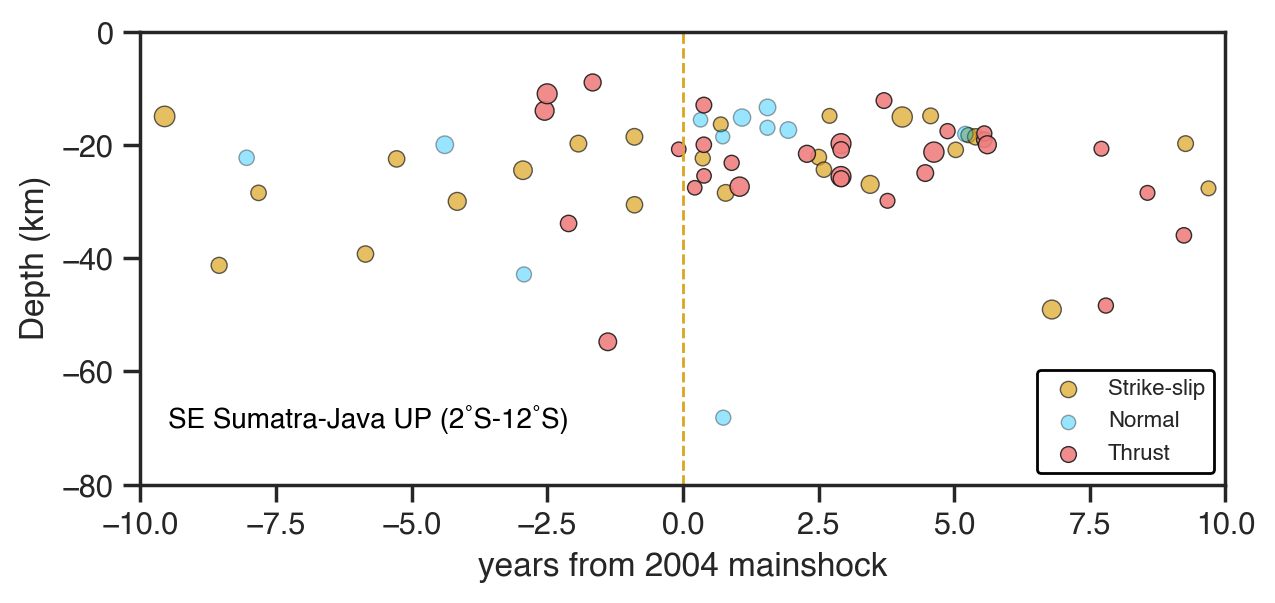

In [41]:
data = df[(df['CLASS'] == 'UPPER') & (df['P(km)'] >= 0)]
# print(data.head())

df_java_norm = data[(data['DEPTH'] < 0) &
                  (data['LAT'] <= -2)& (data['LON'] <= 120) &
             (data['TYPE'] == 'NORM')]

df_java_thrust = data[(data['DEPTH'] < 0) &
                  (data['LAT'] <= -2)& (data['LON'] <= 120) &
             (data['TYPE'] == 'THRUST')]

df_java_ss = data[(data['DEPTH'] < 0) &
                  (data['LAT'] <= -2)& (data['LON'] <= 120) &
             (data['TYPE'] == 'SS')]


fig, ax = plt.subplots(dpi = 200, figsize=(7,3))
fig1 = ax

fig1.scatter(df_java_ss['YEARS'], df_java_ss['DEPTH'], s = df_java_ss['MW']**2.1, linewidth = 0.5,
             edgecolors = 'k', alpha = 0.7, c = 'goldenrod', label='Strike-slip')
fig1.scatter(df_java_norm['YEARS'], df_java_norm['DEPTH'], s = df_java_norm['MW']**2.1, linewidth = 0.5,
             edgecolors = 'k', alpha = 0.4, c = 'deepskyblue', label='Normal')
fig1.scatter(df_java_thrust['YEARS'], df_java_thrust['DEPTH'], s = df_java_thrust['MW']**2.1, linewidth = 0.5,
             edgecolors = 'k', alpha = 0.9, c = 'lightcoral', label='Thrust')

fig1.axvline(x=0, color='goldenrod', lw=lw, ls='--')
# fig1.axvline(x=0.25, color='blue', lw=lw, ls='--')
# fig1.axvline(x=2.8, color='grey', lw=lw, ls='--')


fig1.set_xlabel('years from 2004 mainshock')
fig1.set_ylabel('Depth (km)') 

fig1.set_xlim(x_axis)
fig1.set_ylim(y_axis_UP)

fig1.legend(loc = 'lower right',
            fontsize = 8,
            facecolor="white",
            framealpha=1,
            edgecolor="black",
            markerscale=0.9)

ax.text(xtext, ytext_UP, 'SE Sumatra-Java UP (2˚S-12˚S)',color='black', fontsize=10) #ha='center'

plt.savefig("/Users/mohd0001/PhD_Monash/Paper2/output/TimeDepth_upperSEsumJava.png",
            dpi = 300, transparent= True, bbox_inches='tight')

## Java Subducting plate

Text(-1.8, -500, 'Long Slab beneath SE Sumatra-Java')

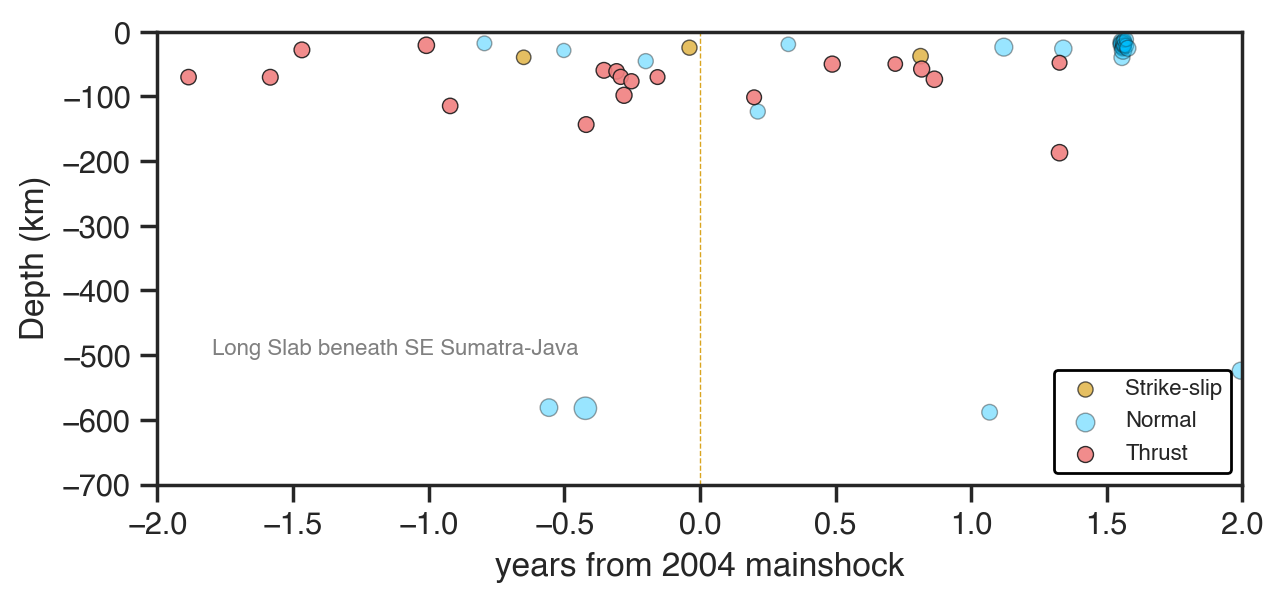

In [77]:
data = df[(df['CLASS'] == 'DGOING') &
          (df['P(km)'] >= 0) &
          (df['DEPTH'] < 0) &
                  (df['LAT'] < -2)& (df['LON'] < 120)]



df_java_norm = data[(data['TYPE'] == 'NORM')]

df_java_thrust = data[(data['TYPE'] == 'THRUST')]

df_java_ss = data[(data['TYPE'] == 'SS')]


fig, ax = plt.subplots(dpi = 200, figsize=(7,3))
fig1 = ax

fig1.scatter(df_java_ss['YEARS'], df_java_ss['DEPTH'], s = df_java_ss['MW']**2.1, linewidth = 0.5,
             edgecolors = 'k', alpha = 0.7, c = 'goldenrod', label='Strike-slip')
fig1.scatter(df_java_norm['YEARS'], df_java_norm['DEPTH'], s = df_java_norm['MW']**2.1, linewidth = 0.5,
             edgecolors = 'k', alpha = 0.4, c = 'deepskyblue', label='Normal')
fig1.scatter(df_java_thrust['YEARS'], df_java_thrust['DEPTH'], s = df_java_thrust['MW']**2.1, linewidth = 0.5,
             edgecolors = 'k', alpha = 0.9, c = 'lightcoral', label='Thrust')

fig1.axvline(x=0, color='goldenrod', lw=0.5, ls='--')
# fig1.axvline(x=0.25, color='blue', lw=0.5, ls='--')
# fig1.axvline(x=2.8, color='grey', lw=0.5, ls='--')

fig1.set_xlabel('years from 2004 mainshock')
fig1.set_ylabel('Depth (km)') 

fig1.set_xlim([-2, 2])
fig1.set_ylim(y_axis_SP_SJ)

fig1.legend(loc = 'lower right',
            fontsize = 8,
            facecolor="white",
            framealpha=1,
            edgecolor="black",
            markerscale=0.9)

ax.text(-1.8, -500, 'Long Slab beneath SE Sumatra-Java',color='gray', fontsize=8) #ha='center'


# plt.savefig("/Users/mohd0001/PhD_Monash/Paper2/output/TimeDepth_slabSEsumJava.png",
#             dpi = 300, transparent= True, bbox_inches='tight')

## Java upper plate between 115˚E-120˚E

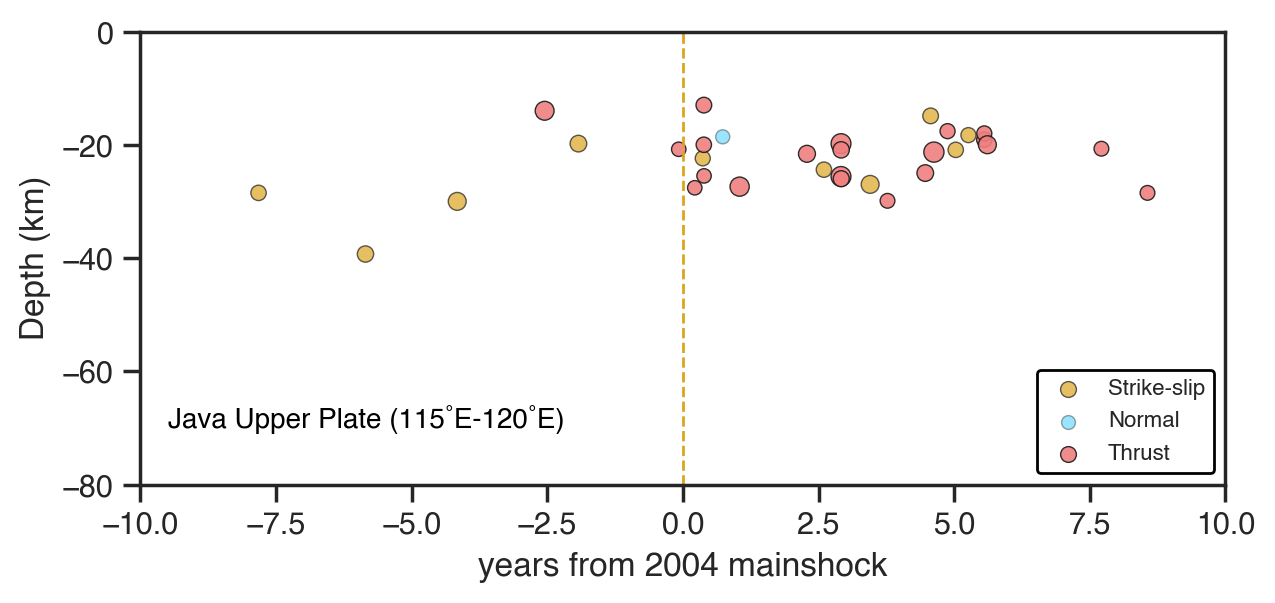

In [43]:
## thrust seismicity in the upper plate increase in Java upper plate after 2004 Sumatra event? Let's check

data = df[(df['CLASS'] == 'UPPER') & (df['P(km)'] >= 0)]
# print(data.head())

df_java_norm = data[(data['DEPTH'] < 0) &
                  (data['LON'] >= 115)&
             (data['TYPE'] == 'NORM')]

df_java_thrust = data[(data['DEPTH'] < 0) &
                  (data['LON'] >= 115)&
             (data['TYPE'] == 'THRUST')]

df_java_ss = data[(data['DEPTH'] < 0) &
                  (data['LON'] >= 115)&
             (data['TYPE'] == 'SS')]


fig, ax = plt.subplots(dpi = 200, figsize=(7,3))
fig1 = ax

fig1.scatter(df_java_ss['YEARS'], df_java_ss['DEPTH'], s = df_java_ss['MW']**2.1, linewidth = 0.5,
             edgecolors = 'k', alpha = 0.7, c = 'goldenrod', label='Strike-slip')
fig1.scatter(df_java_norm['YEARS'], df_java_norm['DEPTH'], s = df_java_norm['MW']**2.1, linewidth = 0.5,
             edgecolors = 'k', alpha = 0.4, c = 'deepskyblue', label='Normal')
fig1.scatter(df_java_thrust['YEARS'], df_java_thrust['DEPTH'], s = df_java_thrust['MW']**2.1, linewidth = 0.5,
             edgecolors = 'k', alpha = 0.9, c = 'lightcoral', label='Thrust')

fig1.axvline(x=0, color='goldenrod', lw=lw, ls='--')
# fig1.axvline(x=0.25, color='blue', lw=lw, ls='--')
# fig1.axvline(x=2.8, color='grey', lw=lw, ls='--')

fig1.set_xlabel('years from 2004 mainshock')
fig1.set_ylabel('Depth (km)') 

fig1.set_xlim(x_axis)
fig1.set_ylim(y_axis_UP)

fig1.legend(loc = 'lower right',
            fontsize = 8,
            facecolor="white",
            framealpha=1,
            edgecolor="black",
            markerscale=0.9)

ax.text(xtext, ytext_UP, 'Java Upper Plate (115˚E-120˚E)',color='black', fontsize=10) #ha='center'

plt.savefig("/Users/mohd0001/PhD_Monash/Paper2/output/TimeDepth_JavaUP_115-120LON.png",
            dpi = 300, transparent= True, bbox_inches='tight')

## Megathrust seismicity temporal variation

### Andaman

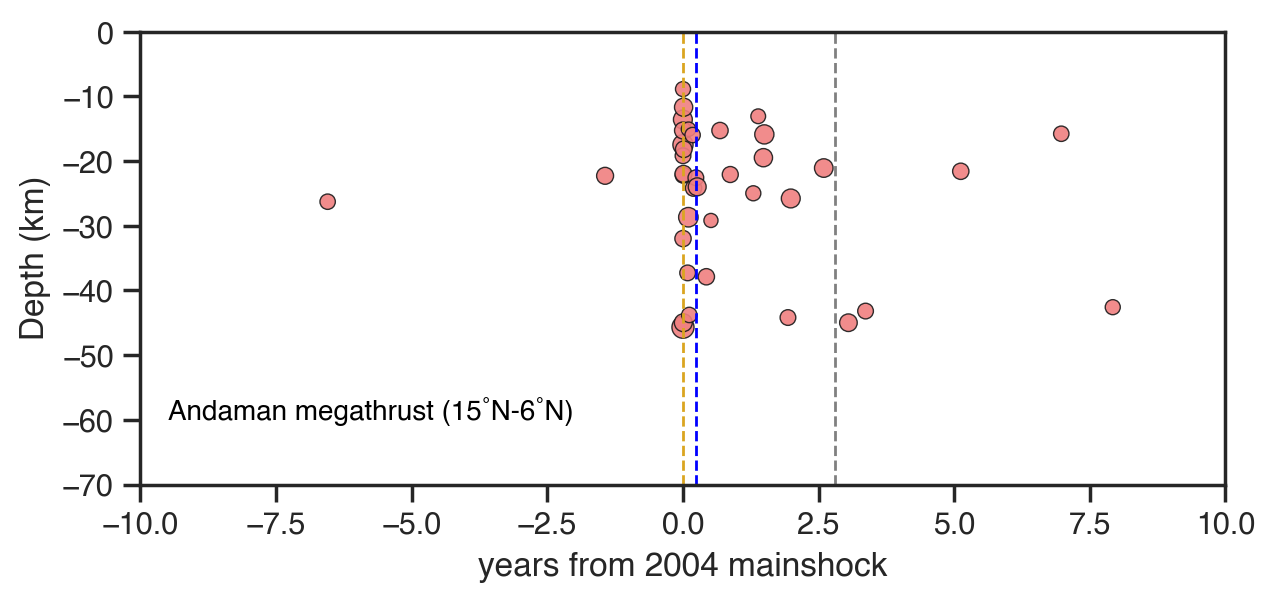

In [44]:
data = df[(df['CLASS'] == 'MTHRUST') & (df['DEPTH'] >= -50)]

df_java_thrust = data[(data['LAT'] >= 6)& (data['LAT'] <= 15) &
             (data['TYPE'] == 'THRUST')]

fig, ax = plt.subplots(dpi = 200, figsize=(7,3))
fig1 = ax

fig1.scatter(df_java_thrust['YEARS'], df_java_thrust['DEPTH'], s = df_java_thrust['MW']**2.1, linewidth = 0.5,
             edgecolors = 'k', alpha = 0.9, c = 'lightcoral', label='Thrust')
lw=1
fig1.axvline(x=0, color='goldenrod', lw=lw, ls='--')
fig1.axvline(x=0.25, color='blue', lw=lw, ls='--')
fig1.axvline(x=2.8, color='grey', lw=lw, ls='--')

fig1.set_xlabel('years from 2004 mainshock')
fig1.set_ylabel('Depth (km)')

fig1.set_xlim(x_axis)
fig1.set_ylim(y_axis_mt)

# fig1.legend(loc = 'upper right',
#             fontsize = 8,
#             facecolor="white",
#             framealpha=1,
#             edgecolor="black",
#             markerscale=0.9)


ax.text(xtext, ytext_mt, 'Andaman megathrust (15˚N-6˚N)',color='black', fontsize=10) #ha='center'

plt.savefig("/Users/mohd0001/PhD_Monash/Paper2/output/TimeDepth_AndMT.png",
            dpi = 300, transparent= True, bbox_inches='tight')

### Mid-NW Sumatra

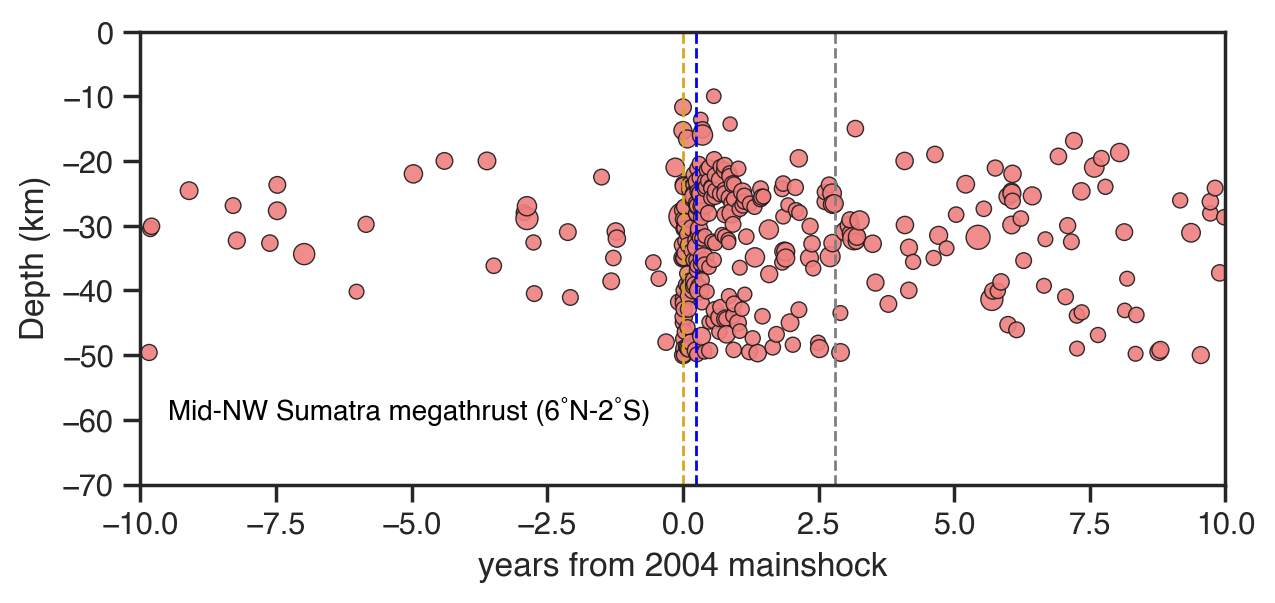

In [45]:
# data = df[(df['CLASS'] == 'MTHRUST') & (df['P(km)'] >= 0)]

df_java_thrust = data[(data['LAT'] >= -2)& (data['LAT'] < 6)&
             (data['TYPE'] == 'THRUST')]

fig, ax = plt.subplots(dpi = 200, figsize=(7,3))
fig1 = ax

fig1.scatter(df_java_thrust['YEARS'], df_java_thrust['DEPTH'], s = df_java_thrust['MW']**2.1, linewidth = 0.5,
             edgecolors = 'k', alpha = 0.9, c = 'lightcoral', label='Thrust')

fig1.axvline(x=0, color='goldenrod', lw=lw, ls='--')
fig1.axvline(x=0.25, color='blue', lw=lw, ls='--')
fig1.axvline(x=2.8, color='grey', lw=lw, ls='--')

fig1.set_xlabel('years from 2004 mainshock')
fig1.set_ylabel('Depth (km)') 


fig1.set_xlim(x_axis)
fig1.set_ylim(y_axis_mt)

# fig1.legend(loc = 'upper right',
#             fontsize = 8,
#             facecolor="white",
#             framealpha=1,
#             edgecolor="black",
#             markerscale=0.9)

ax.text(xtext, ytext_mt, 'Mid-NW Sumatra megathrust (6˚N-2˚S)',color='black', fontsize=10) #ha='center'

plt.savefig("/Users/mohd0001/PhD_Monash/Paper2/output/TimeDepth_NWsumMT.png",
            dpi = 300, transparent= True, bbox_inches='tight')

### SE Sumatra-Java

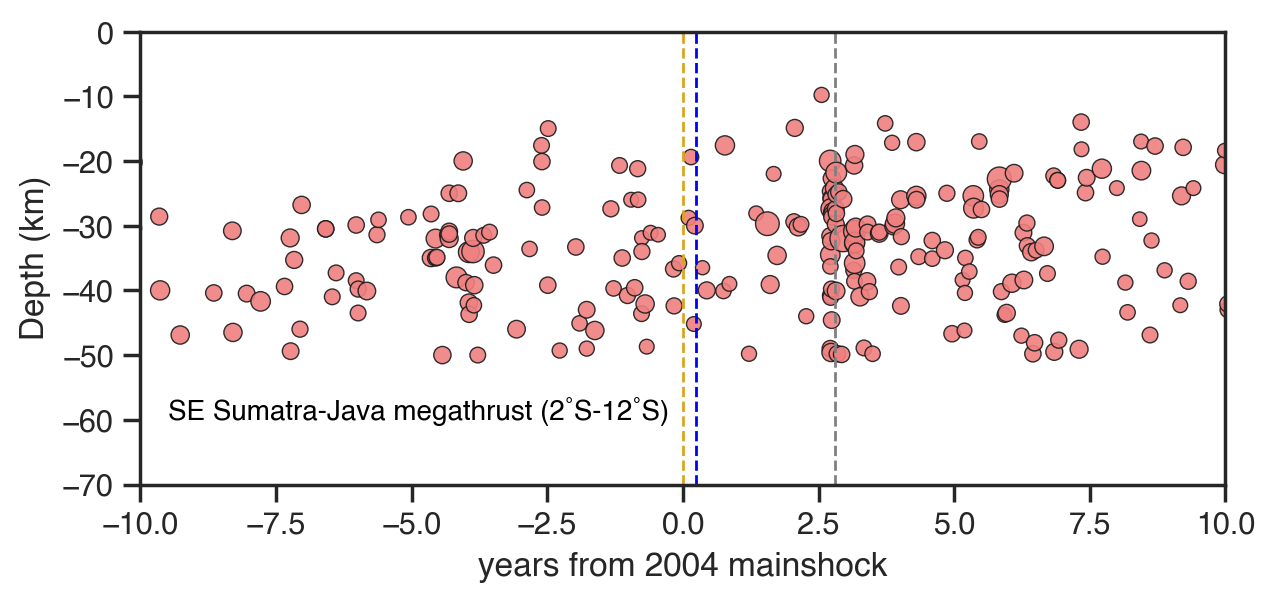

In [46]:
# data = df[(df['CLASS'] == 'MTHRUST') & (df['P(km)'] >= 0)]

df_java_thrust = data[(data['LAT'] < -2)&
             (data['TYPE'] == 'THRUST')]

fig, ax = plt.subplots(dpi = 200, figsize=(7,3))
fig1 = ax

fig1.scatter(df_java_thrust['YEARS'], df_java_thrust['DEPTH'], s = df_java_thrust['MW']**2.1, linewidth = 0.5,
             edgecolors = 'k', alpha = 0.9, c = 'lightcoral', label='Thrust')

fig1.axvline(x=0, color='goldenrod', lw=lw, ls='--')
fig1.axvline(x=0.25, color='blue', lw=lw, ls='--')
fig1.axvline(x=2.8, color='grey', lw=lw, ls='--')

fig1.set_xlabel('years from 2004 mainshock')
fig1.set_ylabel('Depth (km)') 


fig1.set_xlim(x_axis)
fig1.set_ylim(y_axis_mt)

# fig1.legend(loc = 'upper right',
#             fontsize = 8,
#             facecolor="white",
#             framealpha=1,
#             edgecolor="black",
#             markerscale=0.9)

ax.text(xtext, ytext_mt, 'SE Sumatra-Java megathrust (2˚S-12˚S)',color='black', fontsize=10) #ha='center'

plt.savefig("/Users/mohd0001/PhD_Monash/Paper2/output/TimeDepth_SEsumJavaMT.png",
            dpi = 300, transparent= True, bbox_inches='tight')